In [307]:
%matplotlib inline

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Principal Component Analysis (PCA): Toy Example
### Build the dataset
Build $X \in \mathbb{R}^{m \times n}$, $m$ data points $\in \mathbb{R^n}$.

Let $m = 400$ et $n=2$ (i.e., each row $A$ represents a point in $\mathbb{R}^2$).

+ To build $X$ we first create a matrix $A \in \mathbb{R}^{m \times n}$ such that $\forall i,j A_{i,j}\sim \mathcal{N}(0,1)$ 
+ Then we transform $A$ by applying a matrix $T$ (rotation, and scaling)

In [309]:
m = 400
n = 2
# Build a matrix with m columns and n rows, such that each element follows a normal distribution
A = np.random.randn(m,n) 
# Create a matrix that will modify the initial matrix (rotation, scale change)
T = np.array([[-0.5,0.3],
              [1,2]])
# Apply the linear transformation matrix T to the data matrix A
X = np.dot(A,T)

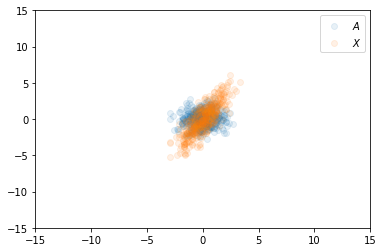

In [310]:
# Plot the 1st column vector of A vs. the 2nd column vector of A
plt.plot(A[:,0],A[:,1],"o",alpha=0.1,label="$A$")
# Plot the 1st column vector of A vs. the 2nd column vector of X
plt.plot(X[:,0],X[:,1],"o",alpha=0.1,label="$X$")
# Set limits to x and y axis
plt.xlim(-15, 15)
plt.ylim(-15, 15)
# Plot the legend
plt.legend()

### Center the dataset
+ Let $E[ X_{.,i} ]$ be the mean of $X$ along column $i$.
+ Let us center each column $i$ of $X$ by computing $X_{.,i} \leftarrow X_{.,i} - E[X_{.,i}]$

In [311]:
# Compute the mean of each column vector of X. Notice that X.mean(axis=1) would compute the mean of each row, and X.mean() the overall mean
col_mean = X.mean(axis=0)
# Numpy will subtract the mean vector to each row
Xc = X - col_mean
print(X.mean(axis=0), Xc.mean(axis=0))

[0.049793   0.02578653] [-3.05311332e-17 -8.00748357e-17]


### Covariance Matrix



+ The covariance between column vectors $X_{.,i}$ and $X_{.,j}$ is defined as:

$cov [X_{.,i},X_{.,j}]= \sum_{k=1}^m \frac{(X_{k,i}-E[X_{.,i}])(X_{k,j}-{E}[X_{.,j}])}{m}$

+ Since we have centered our dataset: $\forall i, \; E[X_{.,i}] = 0$, then:

$cov [X_{.,i},X_{.,j}]= \sum_{k=1}^m \frac{X_{k,i}X_{k,j}}{m}$

+ In matrix notation 

$cov [X_{.,i},X_{.,j}] = \frac{1}{m} X_{.,i}^* \cdot X_{.,j}$

+ Therefore matrix $Q = X^* \cdot X$ is proportional to the covariance matrix (by a factor $\frac{1}{m}$)



+ __Question 1__: Compute the covariance matrix of $X$

In [312]:
# If Xc is a numpy array, you can obtain its transpose by typing Xc.T or Xc.transpose()
Xc_transpose = Xc.T
# Xc_transpose.dot(Xc) computes the dot product between Xc_transpose and Xc
Q = Xc_transpose.dot(Xc)
# Xc.shape is a tuple containing the size of the matrix, the 1st element is the number of rows and the 2nd the nb. of cols.
print(Xc.shape)
# Here we simply multiply by 1/m to get the variances and covariances
Q*1/Xc.shape[0]

(400, 2)


array([[1.25832945, 1.91904355],
       [1.91904355, 4.33362603]])

+ __Question 2.A__: Compute the eigen vectors $V$ and eigen values $\lambda$ of matrix $Q = X^*\cdot X$

(recall: $Q\cdot V_{.,i} = \lambda_i V_{.,i} \$)

In [313]:
# np.linalg.eig returns a tuple with 2 elements, the first one is a np.array with the eigen values, and the 2nd a matrix with the eigen vectors (in columns)
lamb,V = np.linalg.eig(Q)

In [314]:
# Check the property of eigen vectors and eigen values
Q.dot(V), V*lamb

(array([[ -121.47999841,  -909.84723615],
        [   58.32901342, -1894.91017114]]),
 array([[ -121.47999841,  -909.84723615],
        [   58.32901342, -1894.91017114]]))

+ __Question 2.B__: The eigen values in numpy are not always sorted, sort them in descending order:


In [315]:
# lamb.argsort() sorts the index of lamb, according to their elements' values (ascending order)
idx = lamb.argsort()  
# We want to order themin descending order, so we invert the list
idx = idx[::-1] 
# We get the eigen values in the right order
lamb = lamb[idx]
# We get the eigen vectors in the right order
V = V[:,idx]
print(lamb)
print(V)

[2102.02439325  134.75779688]
[[-0.43284333 -0.90146916]
 [-0.90146916  0.43284333]]


### Principal Component Analysis

+ Let $PC_i = X \cdot V_{.,i}$ be the $i$-th Principal Component.

+ Compute the covariance between $PC_j$ and $PC_k$ 

$\begin{aligned} cov[PC_j,PC_k] &\propto (X \cdot V_{.,j})^{*} \cdot (X \cdot  V_{.,k})\\&= V_{.,j}^*\cdot X^*\cdot X\cdot  V_{.,k}\\&=V_{.,j}^*\cdot (\lambda_k V_{.,k})\\&=\lambda_k V_{.,j}^{*}\cdot V_{.,k}\end{aligned}$


+ If $j=k$: 

$cov[PC_j,PC_k] = cov[PC_k,PC_k] \propto \lambda_k$

+ Otherwise:

$cov[PC_j,PC_k] = 0$



+ __Question 3.A:__ Plot the variance explained along each Principal Axis.

Text(0, 0.5, 'Variance explained')

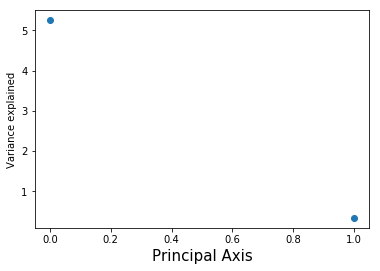

In [316]:
# lamb is equal to the sum of coordinates to the square in the principal axis space. We need to devide these values by the number of rows, to get the variance
plt.plot(lamb/Xc.shape[0], "o")
plt.xlabel("Principal Axis",fontsize=15)
plt.ylabel('Variance explained')

+ __Question 3.B:__ Plot the percentage of variance explained along each Principal Axis.

Text(0, 0.5, 'Variance explained (%)')

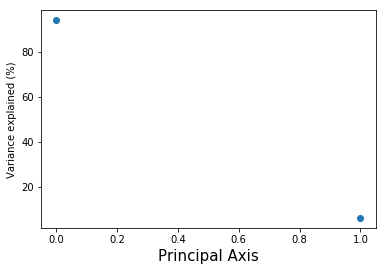

In [317]:
# lamb.sum() returns the sum of the lambda values. 
plt.plot(lamb/lamb.sum()*100, "o")
plt.xlabel("Principal Axis",fontsize=15)
plt.ylabel('Variance explained (%)')

+ __Question 3.C__: Explain the role of the Principal Component Analysis

__Question 3.D__
+ Apply the matrix $V$ to $X$ and plot the Principal Components
+ Apply the matrix $V$ to the cardinal basis and plot them

In [318]:
# Compute the principal components
PC = Xc.dot(V)
# Canonical axis (2D idendity matrix)
cannonical_axis = np.eye(2)
# Project the canonical using matrix V
axis_proj = cannonical_axis.dot(V)

(-5, 5)

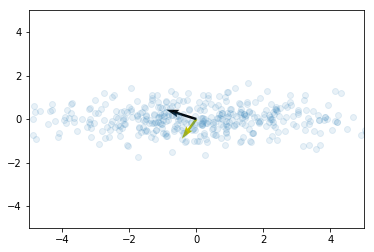

In [319]:
plt.plot(PC[:,0],PC[:,1],"o",alpha=0.1)
plt.quiver(*axis_proj[:,0],color="y",angles='xy', scale_units='xy', scale=1)
plt.quiver(*axis_proj[:,1],color="k",angles='xy', scale_units='xy', scale=1)
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5, 5)

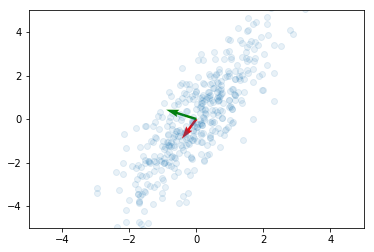

In [320]:
plt.plot(Xc[:,0],Xc[:,1],"o",alpha=0.1)
plt.quiver(*V.T[0,:],color="r",angles='xy', scale_units='xy', scale=1)
plt.quiver(*V.T[1,:],color="g",angles='xy', scale_units='xy', scale=1)
plt.xlim(-5,5)
plt.ylim(-5,5)

__Question 3.E:__ Given the structure of the dataset in the new space, and the percentage of variance explained along each principal axis, does it seem necessary to keep a a 2D space representation?

## Principal Component Analysis and SVD

The singular value decomposition (SVD) of $X$ is:

$X = U \cdot \Sigma \cdot \mathbf{V}^*$

+ $U$ is a $m\times m$ unit orthogonal matrix (called left singular vectors of X)
+ $V$ is a $n\times n$ unit orthogonal matrix (called right singular vectors of X)
+ $\Sigma$ is an $m\times n$ positive rectangular diagonal matrix (singular values of X)


Using the SVD, $X^* X$ can be written as:

$\begin{aligned}X^*X &=V \Sigma^* U^* U \Sigma V^*\\&= V \Sigma^*\Sigma V^* \\&= V \hat {\Sigma}^{2}V^*\end{aligned}$

Therefore: 

+ The __right singular vectors__ $V$ of $X$ and the __eigenvectors__ of $X^*X$ are equivalent.
+ The __singular values__  of $X$ are equal to the sqrt of the the __eigenvalues__ of $X^*X$.

$$PC = U\cdot \Sigma = X\cdot V$$

__Question 4:__ Compute the Principal Components of $X$ using the SVD

In [321]:
# Compute the SVD of Xc, this function returns a tuple with 3 elements: matrix U, an array with the singular values, and matrix V transposed
U,s,Vt = np.linalg.svd(Xc)

In [322]:
# Compute the principal components
V = Vt.T
PC = Xc.dot(V)

(-5, 5)

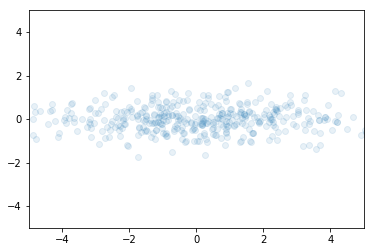

In [323]:
plt.plot(PC[:,0],PC[:,1],"o", alpha=0.1)
plt.xlim(-5,5)
plt.ylim(-5,5)

# Principal Component Analysis (PCA): Faces dataset
## Load the dataset

In [324]:
# Load the dataset from a library
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data

In [325]:
#If the sklearn library is not installed, you can load the faces dataset (attached to the email) uncommenting and running the following commands:
#import pandas as pd
#faces = pd.read_csv("faces.csv",header=0,index_col=0)
#faces = faces.values

Each row of the `faces` dataset represents a human face picture in gray scale.
The dataset contains 400 pictures in total.

In practice, the size of a picture is $64 \times 64$ pixels, and in order to fill the matrix, each picture has been flattened in a row vector with 4096 ($=64 \times 64$) elements.

Therefore the faces image represents 400 pictures described in a 4096 dimensional space of pixels.

If we transpose the faces dataset, we have 4096 pixels described in a 400 dimensional space of human faces.

In this practical work we are going to use the SVD to find the "Principal Faces" in the dataset

__Question 1__: Reshape the first row of the dataset, to create a $64\times 64$ image, and plot the first face, using the `plt.imshow`

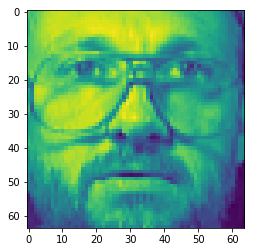

In [326]:
# We get the first row (the first face)
first_face = faces[0,:]
# We reshape it, to have a 64x64 matrix 
reshaped_first_face = first_face.reshape(64,64)
# We plot it
plt.imshow(reshaped_first_face)

__Question 4__: Transpose the `faces` matrix (we are going to work with the transpose only) and center each column

In [327]:
faces = faces.T
faces = faces - faces.mean(axis=0)

__Question 3__: Compute its SVD

In [328]:
U,s,Vt = np.linalg.svd(faces,full_matrices=False)

__Question 4:__ Plot the percentage of standard deviation explained along the 20 first principal axis

Text(0, 0.5, 'Variance Explained (%)')

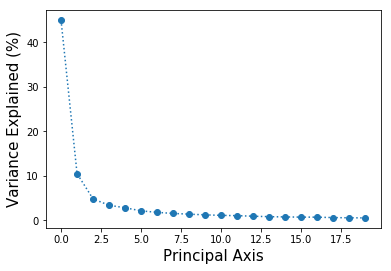

In [329]:
var_explained = s**2
plt.plot(var_explained[:20]/var_explained.sum()*100,"o:")
plt.xlabel("Principal Axis",fontsize=15)
plt.ylabel("Variance Explained (%)",fontsize=15)

__Question 5:__ Compute the principal components

In [330]:
PC = faces.dot(Vt.T)

__Question 6:__ Plot the first and the last 4 "Principal Faces" 

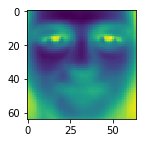

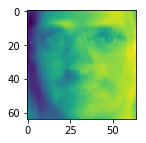

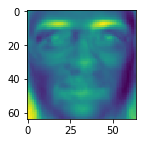

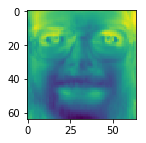

In [331]:
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(PC[:,i].reshape(64,64))

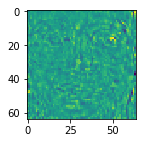

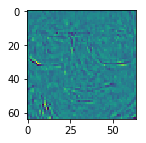

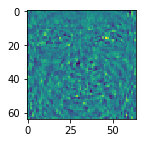

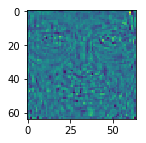

In [332]:
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(PC[:,-i-1].reshape(64,64))

Let $V^k$ be a matrix containing the first $k$ columns of matrix $V$.

Let $\hat X = X \cdot V^k \cdot (V^k)^*$ be an approximation of $X$ using only the first $k$ principal axis

__Question 7:__ Compute $\hat X$ for the `face` dataset (for k = 3 and k = 50) and plot the first 4 faces of the new dataset

In [333]:
V = Vt.T
k=100
faces_filtered = faces.dot(V[:,:k]).dot(V[:,:k].T)

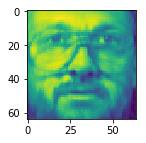

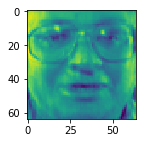

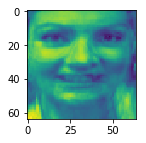

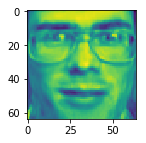

In [334]:
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(faces_filtered[:,i].reshape(64,64))

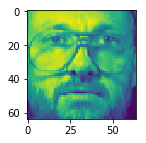

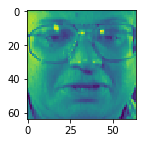

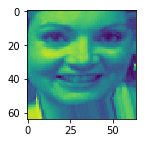

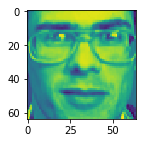

In [335]:
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(faces[:,i].reshape(64,64))

__Question 8:__ Let $|| X - \hat X ||_2$ be the approximation error. Compute the error for k = 2 to 400

In [336]:
def SSE(X,X_hat):
    return(((X - X_hat)**2).sum().sum())

In [337]:
V = Vt.T
errors = []
for k in range(2,400):    
    faces_filtered = faces.dot(V[:,:k]).dot(V[:,:k].T)
    errors.append(SSE(faces, faces_filtered))

Text(0, 0.5, 'SSE')

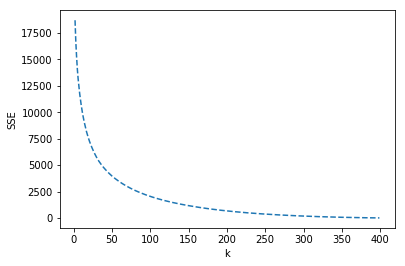

In [338]:
plt.plot(range(2,400),errors,"--")
plt.xlabel("k")
plt.ylabel("SSE")